# Keras Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
df_feat = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,...,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,...,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,...,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,...,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,...,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [9]:
df_target = pd.DataFrame(cancer['target'], columns = ['Cancer'])
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [10]:
frames = [df_feat, df_target]
df = pd.concat(frames, axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,...,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,...,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,...,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,...,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,...,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,0


## Exploratory Data Analysis and Visualization

In [11]:
df.shape

(569, 31)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean fractal dimension,569.000,0.063,0.007,0.050,0.058,0.062,0.066,0.097


In [13]:
df.Cancer.value_counts()

1    357
0    212
Name: Cancer, dtype: int64

<AxesSubplot:xlabel='Cancer', ylabel='count'>

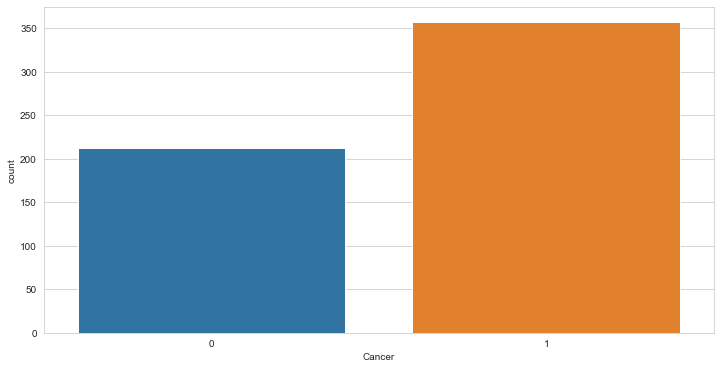

In [14]:
sns.countplot(df["Cancer"])

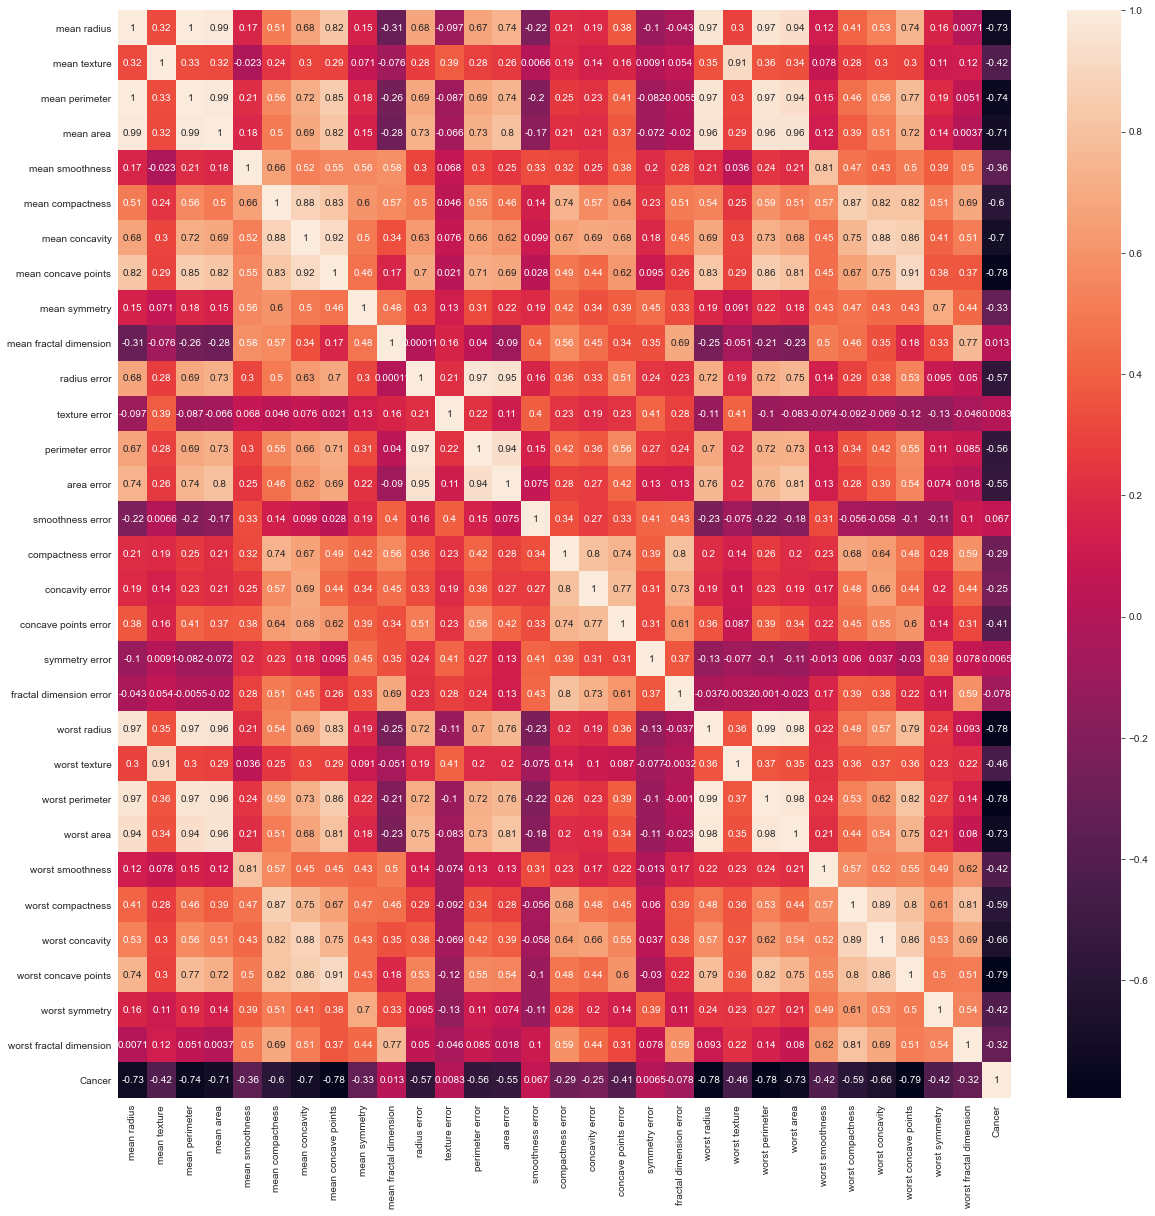

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [16]:
drop_list = ["worst perimeter", "worst area", "perimeter error", "area error", "mean perimeter", "mean area"]

In [17]:
df=df.drop(drop_list, axis=1)

In [18]:
df.shape

(569, 25)

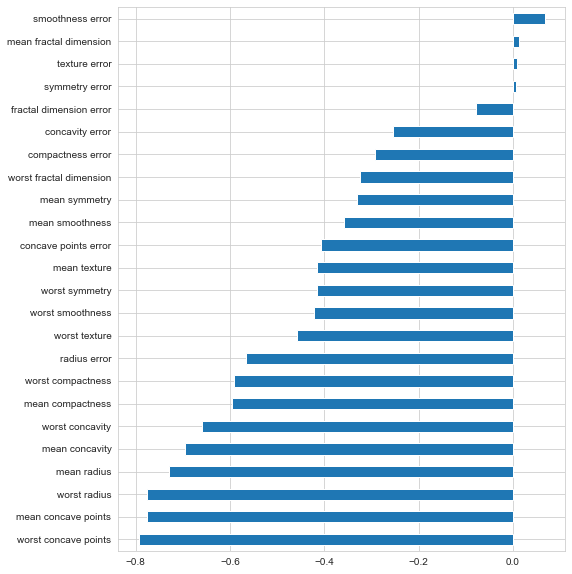

In [19]:
plt.figure(figsize = (8,10))
df.corr()['Cancer'].sort_values().drop("Cancer").plot(kind = "barh");

## Preprocessing of Data
- Train | Test Split, Scalling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [21]:
X = df.drop('Cancer', axis=1)
y = df['Cancer'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [26]:
X_train.shape

(512, 24)

In [27]:
X_test.shape

(57, 24)

In [28]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [29]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6941 - accuracy: 0.3587 - val_loss: 0.6606 - val_accuracy: 0.5000
Epoch 2/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.4565 - val_loss: 0.6493 - val_accuracy: 0.8462
Epoch 3/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.6563 - accuracy: 0.8217 - val_loss: 0.6300 - val_accuracy: 0.9423
Epoch 4/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.8717 - val_loss: 0.6051 - val_accuracy: 0.9808
Epoch 5/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.6097 - accuracy: 0.8783 - val_loss: 0.5656 - val_accuracy: 1.0000
Epoch 6/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.5713 - accuracy: 0.8870 - val_loss: 0.5133 - val_accuracy: 0.9808
Epoch 7/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.5257 - accuracy: 0.9022 - val_loss: 0.4674 - val_accuracy: 0.9423
Epoch 

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                750       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [31]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.694,0.359,0.661,0.500
1,0.674,0.457,0.649,0.846
2,0.656,0.822,0.630,0.942
3,0.637,0.872,0.605,0.981
4,0.610,0.878,0.566,1.000


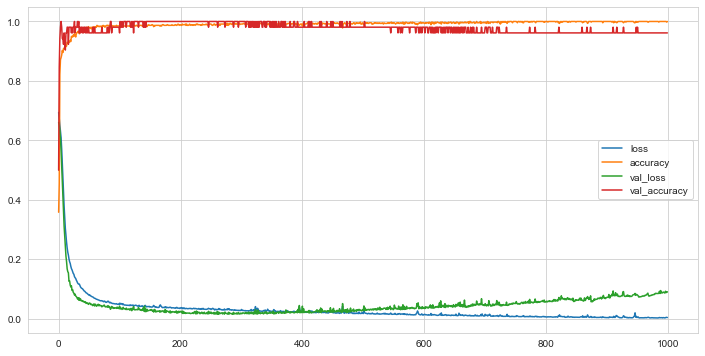

In [32]:
loss_df.plot();

In [33]:
model.evaluate(X_test, y_test, verbose=0)

[0.4008021354675293, 0.9298245906829834]

In [34]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4008021354675293
accuracy :  0.9298245906829834


In [35]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  2]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.94      0.94      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



### EarlyStopping

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [38]:
#The patience is often set somewhere between 10 and 100 (10 or 20 is more common), 
#but it really depends on your dataset and network.

In [40]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [41]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.6687 - accuracy: 0.5261 - val_loss: 0.6217 - val_accuracy: 0.8462
Epoch 2/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.6272 - accuracy: 0.7565 - val_loss: 0.5685 - val_accuracy: 0.9038
Epoch 3/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.5839 - accuracy: 0.8391 - val_loss: 0.5193 - val_accuracy: 0.9808
Epoch 4/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.8630 - val_loss: 0.4720 - val_accuracy: 0.9808
Epoch 5/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.8826 - val_loss: 0.4312 - val_accuracy: 0.9615
Epoch 6/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.8783 - val_loss: 0.3758 - val_accuracy: 0.9615
Epoch 7/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8826 - val_loss: 0.3331 - val_accuracy: 0.9615
Epoch 

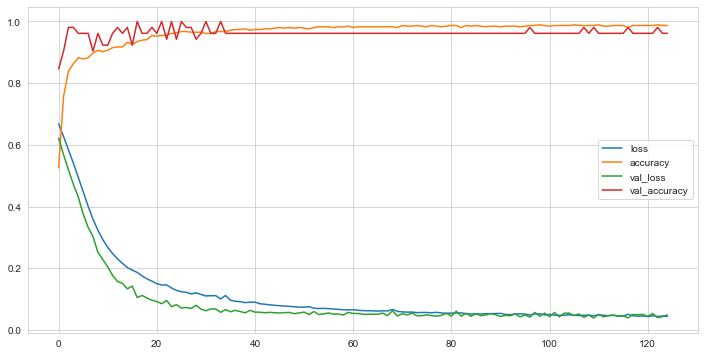

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [43]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.99        36

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



### learning_rate

In [44]:
from tensorflow.keras.optimizers import Adam

In [45]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [46]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [47]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.6753 - accuracy: 0.6022 - val_loss: 0.6407 - val_accuracy: 0.6154
Epoch 2/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.5655 - accuracy: 0.7565 - val_loss: 0.4631 - val_accuracy: 0.9615
Epoch 3/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8848 - val_loss: 0.2583 - val_accuracy: 0.9423
Epoch 4/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.2579 - accuracy: 0.9261 - val_loss: 0.1308 - val_accuracy: 0.9808
Epoch 5/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.2158 - accuracy: 0.9304 - val_loss: 0.0877 - val_accuracy: 1.0000
Epoch 6/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.1600 - accuracy: 0.9391 - val_loss: 0.0958 - val_accuracy: 0.9423
Epoch 7/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.1461 - accuracy: 0.9370 - val_loss: 0.0717 - val_accuracy: 0.9808
Epoch 

<AxesSubplot:>

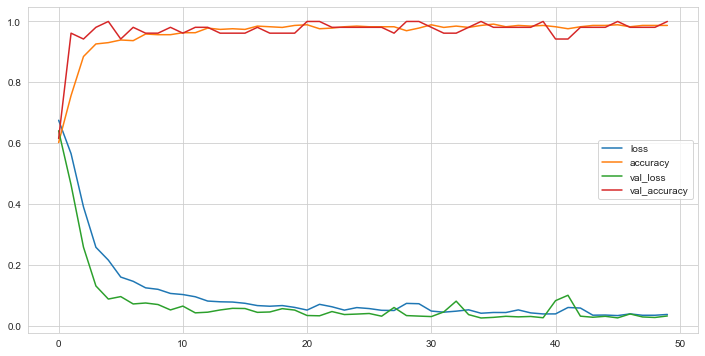

In [48]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [49]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 7 29]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        21
           1       0.97      0.81      0.88        36

    accuracy                           0.86        57
   macro avg       0.85      0.88      0.86        57
weighted avg       0.88      0.86      0.86        57



### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [50]:
from tensorflow.keras.layers import Dropout

In [51]:
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [52]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.6970 - accuracy: 0.5500 - val_loss: 0.6587 - val_accuracy: 0.8077
Epoch 2/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.5935 - val_loss: 0.6499 - val_accuracy: 0.7500
Epoch 3/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.6552 - accuracy: 0.6217 - val_loss: 0.6294 - val_accuracy: 0.7885
Epoch 4/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.6278 - accuracy: 0.6978 - val_loss: 0.6011 - val_accuracy: 0.7885
Epoch 5/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.6299 - accuracy: 0.7022 - val_loss: 0.5744 - val_accuracy: 0.8269
Epoch 6/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.5921 - accuracy: 0.7391 - val_loss: 0.5500 - val_accuracy: 0.8269
Epoch 7/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.5488 - accuracy: 0.7717 - val_loss: 0.5211 - val_accuracy: 0.8654
Epoch 

<AxesSubplot:>

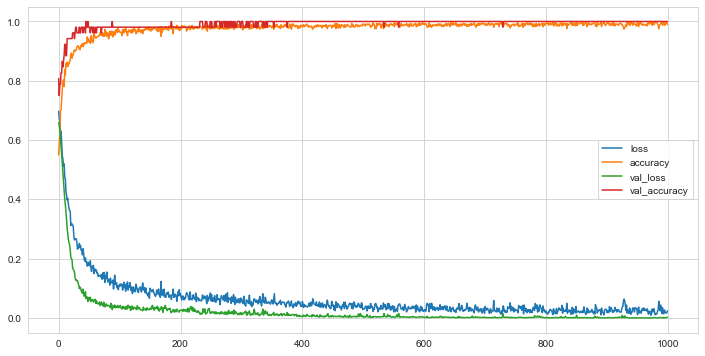

In [53]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [54]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  0]
 [ 5 31]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        21
           1       1.00      0.86      0.93        36

    accuracy                           0.91        57
   macro avg       0.90      0.93      0.91        57
weighted avg       0.93      0.91      0.91        57



## Cross Validation

In [55]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [56]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [57]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)

scores = cross_validate(estimator = classifier, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary

,score_mean,score_std
acc,0.982,0.021
pre,0.979,0.027
rec,0.994,0.013
f1,0.986,0.016


## GridSearchCV

In [59]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [60]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 15)

In [61]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "SGD", "adagrad", "adadelta"]}
grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)
grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Epoch 1/200
16/16 [==============================] - 0s 466us/step - loss: 0.6681 - accuracy: 0.6230
Epoch 2/200
16/16 [==============================] - 0s 465us/step - loss: 0.6328 - accuracy: 0.6836
Epoch 3/200
16/16 [==============================] - 0s 465us/step - loss: 0.5925 - accuracy: 0.7422
Epoch 4/200
16/16 [==============================] - 0s 399us/step - loss: 0.5503 - accuracy: 0.8262
Epoch 5/200
16/16 [==============================] - 0s 465us/step - loss: 0.5050 - accuracy: 0.8438
Epoch 6/200
16/16 [==============================] - 0s 465us/step - loss: 0.4579 - accuracy: 0.8750
Epoch 7/200
16/16 [==============================] - 0s 465us/step - loss: 0.4098 - accuracy: 0.8984
Epoch 8/200
16/16 [==============================] - 0s 465us/step - loss: 0.3646 - accuracy: 0.9004
Epoch 9/200
16/16 [==============================] - 0s 399us/step - loss: 0.3276 - accuracy: 0.9102
Epoch 10/200
16/16 [========

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021FA314CAF0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'optimizer': ['adam', 'rmsprop', 'SGD', 'adagrad',
                                       'adadelta']},
             scoring='accuracy', verbose=1)

In [62]:
grid_model.best_score_

0.9726244343891404

In [63]:
grid_model.best_params_

{'batch_size': 32, 'optimizer': 'adam'}

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

#### for keras models

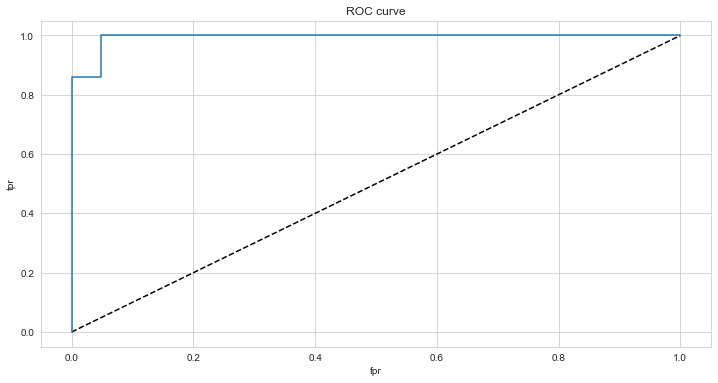

In [64]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [65]:
roc_auc_score(y_test, y_pred_proba)

0.9933862433862435

#### for gridsearchcv model

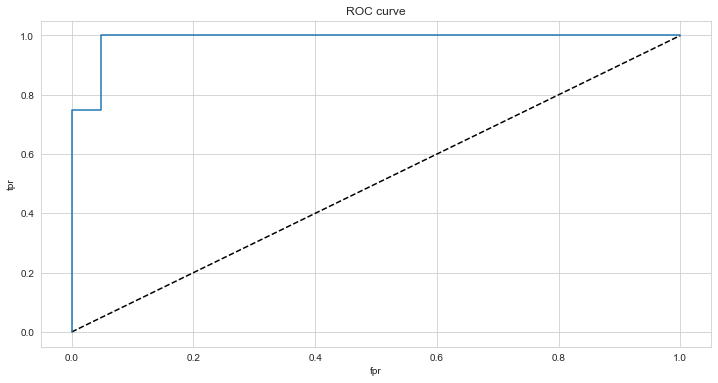

In [66]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [67]:
roc_auc_score(y_test, y_pred_proba)

0.988095238095238

## Saving Final Model and Scaler

In [68]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [69]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [70]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [71]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.4531 - val_loss: 0.6843 - val_accuracy: 0.6316
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.8359 - val_loss: 0.6611 - val_accuracy: 0.8772
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6450 - accuracy: 0.7930 - val_loss: 0.6261 - val_accuracy: 0.8070
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6092 - accuracy: 0.8770 - val_loss: 0.5916 - val_accuracy: 0.9298
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5660 - accuracy: 0.8906 - val_loss: 0.5412 - val_accuracy: 0.9298
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.9160 - val_loss: 0.4877 - val_accuracy: 0.8947
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.9238 - val_loss: 0.4298 - val_accuracy: 0.9474
Epoch 

<AxesSubplot:>

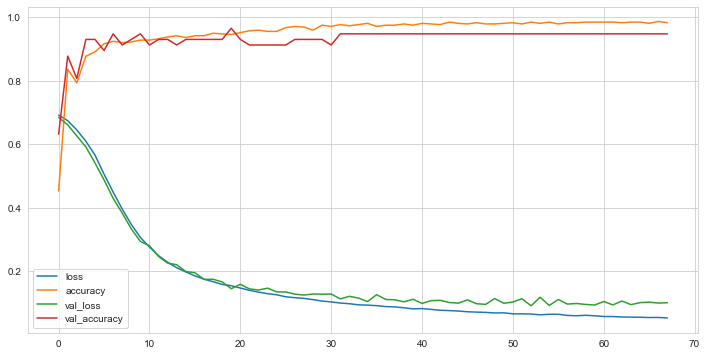

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [73]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



In [74]:
model.save('model_cancer.h5')

## Loading Model and Scaler

In [75]:
from tensorflow.keras.models import load_model

In [76]:
model_cancer = load_model('model_cancer.h5')
scaler_cancer = pickle.load(open("scaler_cancer", "rb"))

## Prediction

In [77]:
single_patient = df.drop('Cancer', axis = 1).iloc[0:1, :]
single_patient

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,...,0.030,0.006,25.380,17.330,0.162,0.666,0.712,0.265,0.460,0.119


In [78]:
single_patient = scaler_cancer.transform(single_patient)
single_patient

array([[0.52103744, 0.0226581 , 0.68000973, 0.7920373 , 0.70313964,
        0.73111332, 0.68636364, 0.60551811, 0.35614702, 0.12046941,
        0.15929565, 0.35139844, 0.13568182, 0.30062512, 0.31164518,
        0.18304244, 0.62077552, 0.14152452, 0.61828432, 0.61929156,
        0.56861022, 0.91202749, 0.59846245, 0.41886396]])

In [79]:
(model_cancer.predict(single_patient) > 0.5).astype("int32")

array([[0]])

In [80]:
df["Cancer"].iloc[0]

0

## Comparison with ML

### Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



### Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57

